## 📈 Análise Exploratória de Dados (EDA) sobre Vendas de Jogos da Plataforma PlayStation: Evolução ao Longo dos Anos de Lançamento

- Pacotes python

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# 1. Configurar para não exibir warnings
warnings.filterwarnings('ignore')

# 2. Configurar o display do pandas (exemplo de configuração - 'non' não é uma opção padrão)
# Se você quis dizer 'None' (nenhum limite), ou queria configurar um número específico de linhas/colunas:

# Opção A: Exibir TODAS as linhas/colunas (sem truncamento)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)




- Leitura do dataset

In [16]:
PATH_FILE = '.\..\data\PlayStation Sales and Metadata (PS3PS4PS5) (Oct 2025).csv'
df = pd.read_csv(PATH_FILE)

- Estrutura do dataset

In [17]:
display(df.shape)
display(df.head())
display(df.info())
display(df.isnull().sum())
display(df.columns)

(4963, 18)

,Game,Console,Name,Publisher,Developer,Total Shipped,Total Sales,NA Sales,PAL Sales,Japan Sales,Other Sales,Release Date,Last Update,rating,ratings_count,metacritic,genres,platforms
0,PS3_Grand Theft Auto V,PS3,Grand Theft Auto V,Rockstar Games,Rockstar North,0.0,20320000.0,6370000.0,9850000.0,990000.0,3120000.0,2013-09-17,NaN,4.47,7225.0,92.0,Action,"PC, PlayStation 5, Xbox One, PlayStation 4, Xb..."
1,PS4_Grand Theft Auto V,PS4,Grand Theft Auto V,Rockstar Games,Rockstar North,0.0,19390000.0,6060000.0,9710000.0,600000.0,3020000.0,2014-11-18,2018-01-03,4.47,7225.0,92.0,Action,"PC, PlayStation 5, Xbox One, PlayStation 4, Xb..."
2,PS4_Call of Duty: Black Ops 3,PS4,Call of Duty: Black Ops 3,Activision,Treyarch,0.0,15090000.0,6180000.0,6050000.0,410000.0,2440000.0,2015-11-06,2018-01-14,NaN,NaN,NaN,NaN,NaN
3,PS4_Red Dead Redemption 2,PS4,Red Dead Redemption 2,Rockstar Games,Rockstar Games,0.0,13940000.0,5260000.0,6210000.0,210000.0,2260000.0,2018-10-26,2018-11-02,4.59,5357.0,96.0,Action,"PC, Xbox One, PlayStation 4"
4,PS3_Call of Duty: Black Ops II,PS3,Call of Duty: Black Ops II,Activision,Treyarch,0.0,13800000.0,4990000.0,5880000.0,650000.0,2280000.0,2012-11-13,NaN,3.96,1417.0,74.0,"Shooter, Action","PC, Xbox One, Xbox 360, PlayStation 3, Wii U"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4963 entries, 0 to 4962
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Game           4963 non-null   object 
 1   Console        4963 non-null   object 
 2   Name           4963 non-null   object 
 3   Publisher      4963 non-null   object 
 4   Developer      4963 non-null   object 
 5   Total Shipped  4963 non-null   float64
 6   Total Sales    4963 non-null   float64
 7   NA Sales       4963 non-null   float64
 8   PAL Sales      4963 non-null   float64
 9   Japan Sales    4963 non-null   float64
 10  Other Sales    4963 non-null   float64
 11  Release Date   3526 non-null   object 
 12  Last Update    2801 non-null   object 
 13  rating         2847 non-null   float64
 14  ratings_count  2847 non-null   float64
 15  metacritic     1530 non-null   float64
 16  genres         2803 non-null   object 
 17  platforms      2847 non-null   object 
dtypes: float

None

Game                0
Console             0
Name                0
Publisher           0
Developer           0
Total Shipped       0
Total Sales         0
NA Sales            0
PAL Sales           0
Japan Sales         0
Other Sales         0
Release Date     1437
Last Update      2162
rating           2116
ratings_count    2116
metacritic       3433
genres           2160
platforms        2116
dtype: int64

Index(['Game', 'Console', 'Name', 'Publisher', 'Developer', 'Total Shipped',
       'Total Sales', 'NA Sales', 'PAL Sales', 'Japan Sales', 'Other Sales',
       'Release Date', 'Last Update', 'rating', 'ratings_count', 'metacritic',
       'genres', 'platforms'],
      dtype='object')

- Selecionando as colunas sem valores nulos

In [18]:
columns = df.isnull().sum() == 0

df = df[df.columns[columns]]


- Tradução das colunas

In [19]:
df.columns = [
    'Jogo',
    'Console',
    'Nome',
    'Distribuidora',
    'Desenvolvedor',
    'Total Enviado',
    'Vendas Totais',
    'Vendas América do Norte',
    'Vendas PAL',
    'Vendas Japão',
    'Outras Vendas'
]

df.head()

,Jogo,Console,Nome,Distribuidora,Desenvolvedor,Total Enviado,Vendas Totais,Vendas América do Norte,Vendas PAL,Vendas Japão,Outras Vendas
0,PS3_Grand Theft Auto V,PS3,Grand Theft Auto V,Rockstar Games,Rockstar North,0.0,20320000.0,6370000.0,9850000.0,990000.0,3120000.0
1,PS4_Grand Theft Auto V,PS4,Grand Theft Auto V,Rockstar Games,Rockstar North,0.0,19390000.0,6060000.0,9710000.0,600000.0,3020000.0
2,PS4_Call of Duty: Black Ops 3,PS4,Call of Duty: Black Ops 3,Activision,Treyarch,0.0,15090000.0,6180000.0,6050000.0,410000.0,2440000.0
3,PS4_Red Dead Redemption 2,PS4,Red Dead Redemption 2,Rockstar Games,Rockstar Games,0.0,13940000.0,5260000.0,6210000.0,210000.0,2260000.0
4,PS3_Call of Duty: Black Ops II,PS3,Call of Duty: Black Ops II,Activision,Treyarch,0.0,13800000.0,4990000.0,5880000.0,650000.0,2280000.0


### Participação do Japão nas vendas ###

In [20]:
pct_japan = df['Vendas Japão'].sum() / df['Vendas Totais'].sum() * 100
print(f'Mercado Japones {pct_japan:.2f}%')

Mercado Japones 7.24%


### Títulos mais vendidos no Japão ###

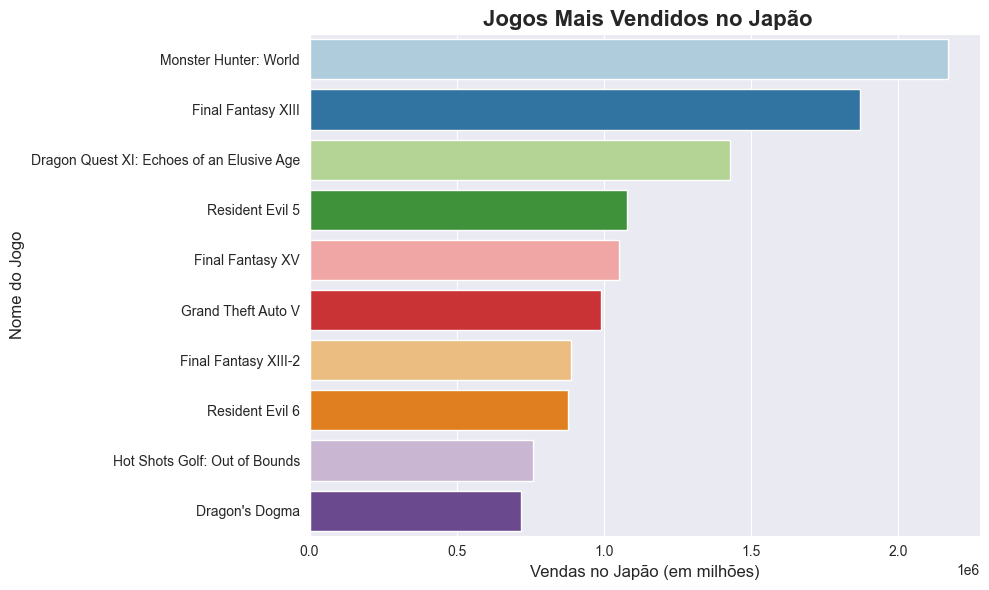

In [26]:

japan_game = df.nlargest(10, 'Vendas Japão')

cores = ['#4c72b0', '#55a868']

plt.figure(figsize=(10, 6))

sns.barplot(
    data=japan_game,
    x='Vendas Japão',
    y='Nome',
    orient='h',
    palette='Paired'
)

plt.title(' Jogos Mais Vendidos no Japão', fontsize=16, fontweight='bold')

plt.xlabel('Vendas no Japão (em milhões)', fontsize=12)
plt.ylabel('Nome do Jogo', fontsize=12)

plt.tight_layout()
plt.savefig('./../fig/vendas_japao.png', dpi=300)
plt.show()

<h3>
Conclusão do mercado japonês
</h3>
<p>
➡️ Consumidores valorizam RPGs, histórias profundas e franquias tradicionais do país.</br>
➡️ Jogos ocidentais têm espaço, mas não dominam.
</p>

### Participação do mercado Norte Americano ###

In [22]:
pct_na = df['Vendas América do Norte'].sum() / df['Vendas Totais'].sum() * 100
print(f'Mercado Norte Americano {pct_na:.2f}%')

Mercado Norte Americano 39.16%


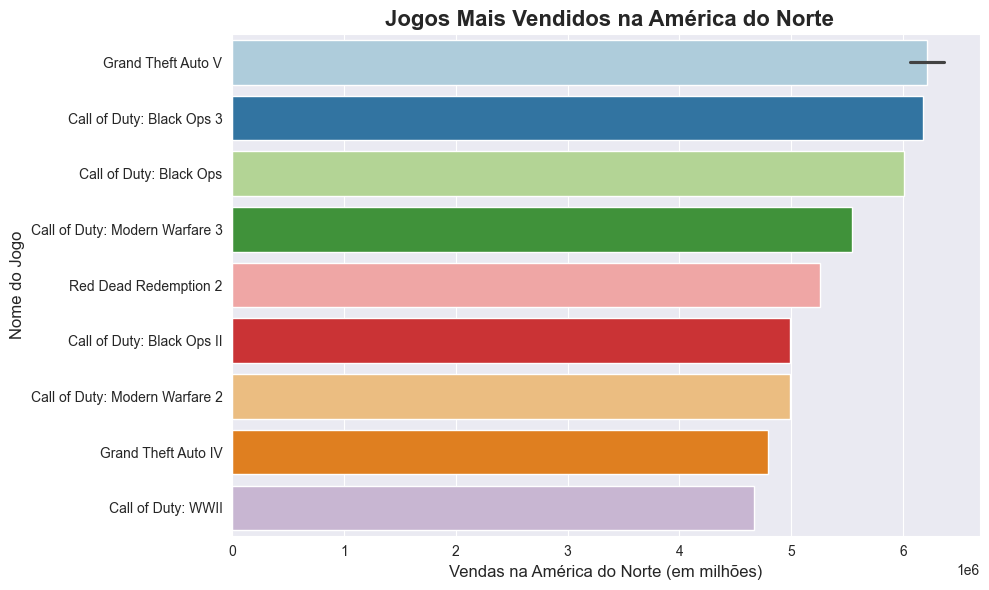

In [23]:
na_games = df.nlargest(10, 'Vendas América do Norte')


cores = ['#4c72b0', '#55a868']

plt.figure(figsize=(10, 6))

sns.set_style('darkgrid')
sns.barplot(
    data=na_games,
    x='Vendas América do Norte',
    y='Nome',
    orient='h',
    palette='Paired'
)

plt.title(' Jogos Mais Vendidos na América do Norte', fontsize=16, fontweight='bold')

plt.xlabel('Vendas na América do Norte (em milhões)', fontsize=12)
plt.ylabel('Nome do Jogo', fontsize=12)

plt.tight_layout()
plt.savefig('./../fig/vendas_na.png', dpi=300)
plt.show()


<h3>
Conclusão do mercado norte-americano
</h3>
<p>
➡️ Forte preferência por jogos de tiro em primeira pessoa (FPS) e ação de mundo aberto.
</br>
➡️ Jogadores priorizam competitividade, ação intensa e gráficos realistas.
</p>

### Participação das vendas na Europa e Oceania ###

In [24]:
pct_pal = df['Vendas PAL'].sum() / df['Vendas Totais'].sum() * 100
print(f'Mercado Europeu e Oceania {pct_pal:.2f}%')

Mercado Europeu e Oceania 38.90%


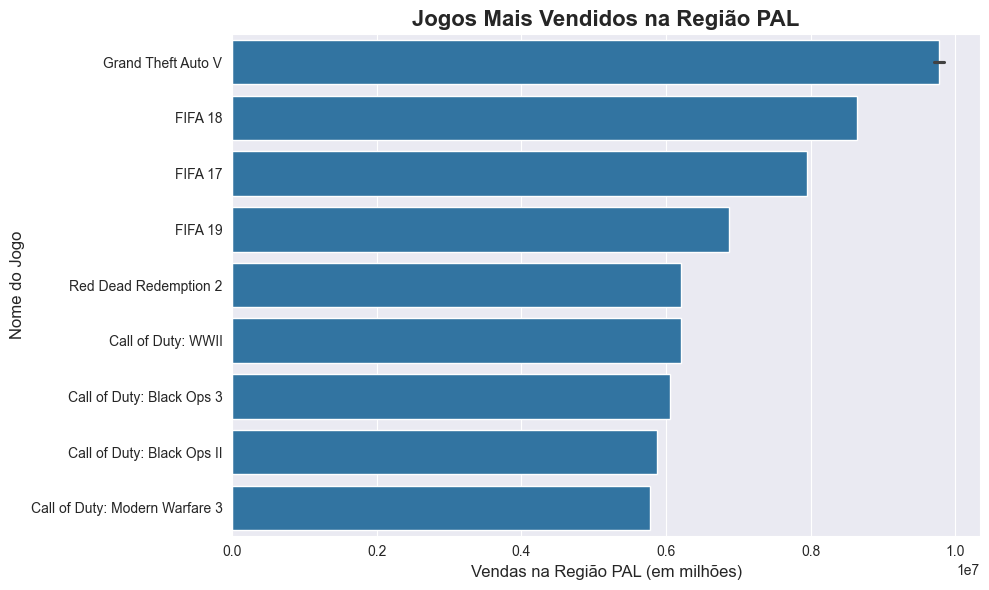

In [25]:

games_pal = df.nlargest(10, 'Vendas PAL')

cor_azul_escuro = ['#1f77b4']

plt.figure(figsize=(10, 6))

sns.barplot(
    data=games_pal,
    x='Vendas PAL',
    y='Nome',
    palette=cor_azul_escuro
)

plt.title('Jogos Mais Vendidos na Região PAL', fontsize=16, fontweight='bold')

plt.xlabel('Vendas na Região PAL (em milhões)', fontsize=12)
plt.ylabel('Nome do Jogo', fontsize=12)

plt.tight_layout()
plt.savefig('./../fig/vendas_pal.png', dpi=300)
plt.show()


<h3>
Conclusão do mercado PAL
</h3>
<p>
➡️ A Europa ama Futebol, o que puxa a franquia FIFA para o topo. </br>
➡️ Ainda assim, jogos de ação e tiro continuam muito fortes, refletindo gosto parecido com o da América do Norte.
</p>

### Participação de Outras Regiões ###

In [30]:
pct_region = df['Outras Vendas'].sum() / df['Vendas Totais'].sum() * 100
print(f'Vendas em outras regiões {pct_region:.2f}%')

Vendas em outras regiões 14.71%


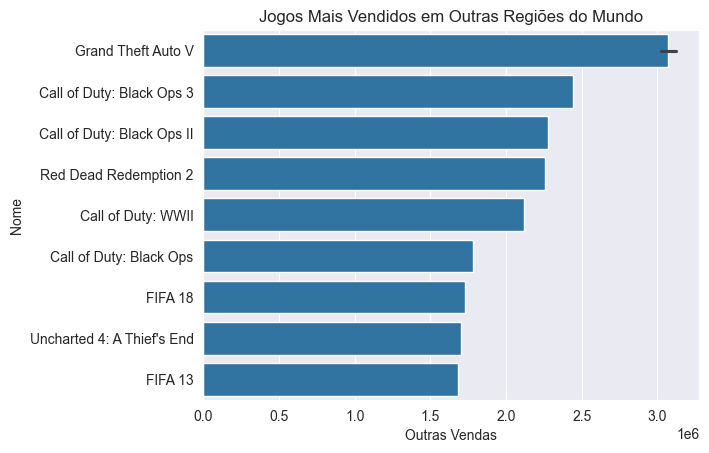

In [38]:
games_region = df.nlargest(10, 'Outras Vendas')

cor_azul_escuro = ['#1f77b4']

sns.set_style('darkgrid')
sns.barplot(
    data= games_region, 
    x = 'Outras Vendas',
    y = 'Nome',
    orient = 'h',
    palette = cor_azul_escuro
)

plt.title('Jogos Mais Vendidos em Outras Regiões do Mundo')

plt.savefig('./../fig/outras_regiões_vendas.png', dpi=300)

<h3>
Conclusão do mercado – Outras Regiões do Mundo
</h3>
<p>
➡️ O mercado apresenta um perfil equilibrado, misturando forte interesse por jogos de ação e tiro — especialmente Call of Duty — com títulos populares mundialmente como GTA V e Red Dead Redemption 2.
<br>
➡️ Jogos de esportes, especialmente FIFA, também têm destaque nessas regiões, impulsionados pela popularidade do futebol na América Latina, Oriente Médio e partes da África.
</br>
➡️ Há espaço para títulos exclusivos de consoles, como Uncharted 4, indicando que plataformas como PlayStation possuem boa penetração nesses mercados.
</p>